# Learning Machine Learning -- Classification 

In [210]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score
import pandas as pd
import matplotlib

In [211]:
dataset = load_iris(as_frame = True)

In [212]:
dataset.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [213]:
df = dataset.data

In [214]:
target = dataset.target
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [215]:
target_names = dataset.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [216]:
encoder = LabelEncoder()
encoder.fit(target_names)
encoder.classes_
encoder.transform(target_names)
actual_target_names_instead_of_Zero_And_One = encoder.inverse_transform(target)
actual_target_names_instead_of_Zero_And_One

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [217]:
full_dataset_with_target_added = df.copy()
full_dataset_with_target_added['target'] = target
full_dataset_with_target_added['Target Names'] = actual_target_names_instead_of_Zero_And_One
full_dataset_with_target_added

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Target Names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [218]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [220]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: ylabel='Frequency'>

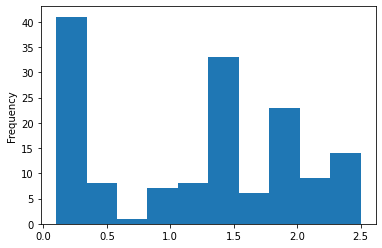

In [221]:
df['petal width (cm)'].plot(kind = 'hist')

In [222]:
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size = 0.26)

In [223]:
model = DecisionTreeClassifier()

In [224]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [225]:
predicted_y = model.predict(x_test)
predicted_y

array([0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0])

In [226]:
predicted_y_target_names = encoder.inverse_transform(predicted_y)
y_test_target_name = encoder.inverse_transform(y_test)

In [227]:
print("Model Accuracy Is:", accuracy_score(y_test,predicted_y))
print("R2 Score:",r2_score(y_test, predicted_y))

Model Accuracy Is: 0.9743589743589743
R2 Score: 0.9596273291925466


In [228]:
Test_result_dataset = x_test.copy()
Test_result_dataset['y_test'] = y_test
Test_result_dataset['predicted_y']= predicted_y 
Test_result_dataset['Y_test_target_name'] = y_test_target_name
Test_result_dataset['predicted_y_target_names'] = predicted_y_target_names

In [229]:
Test_result_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_test,predicted_y,Y_test_target_name,predicted_y_target_names
39,5.1,3.4,1.5,0.2,0,0,setosa,setosa
42,4.4,3.2,1.3,0.2,0,0,setosa,setosa
127,6.1,3.0,4.9,1.8,2,2,virginica,virginica
62,6.0,2.2,4.0,1.0,1,1,versicolor,versicolor
68,6.2,2.2,4.5,1.5,1,1,versicolor,versicolor
58,6.6,2.9,4.6,1.3,1,1,versicolor,versicolor
117,7.7,3.8,6.7,2.2,2,2,virginica,virginica
5,5.4,3.9,1.7,0.4,0,0,setosa,setosa
110,6.5,3.2,5.1,2.0,2,2,virginica,virginica
83,6.0,2.7,5.1,1.6,1,2,versicolor,virginica
